In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib

  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.1 MB 2.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 2.0 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.2 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 2.0 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 1.9 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.9 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.0 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 2.0 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.1 MB 2.0 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 1.9 MB/s eta 0:00:02
   -------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [5]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
df=pd.read_csv('nasdaq100.csv',sep=';')

In [10]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [11]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [15]:
df=df.drop(columns=['Date'])

In [16]:
df

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Text(0.5, 1.0, 'NASDAQ 100 Stock Price')

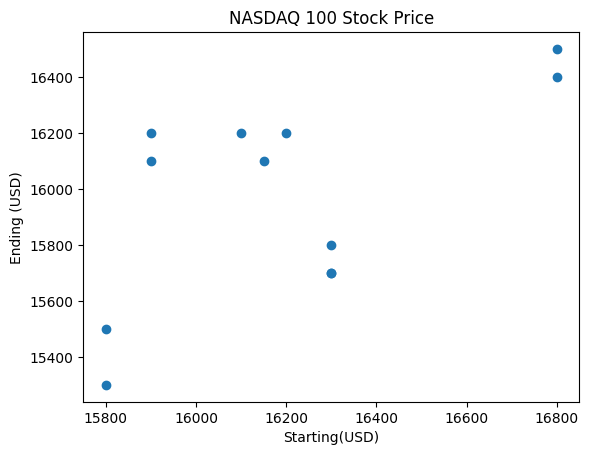

In [18]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ 100 Stock Price')

In [23]:
y=df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg=LinearRegression()

In [26]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [27]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'NASDAQ 100 Stock Price')

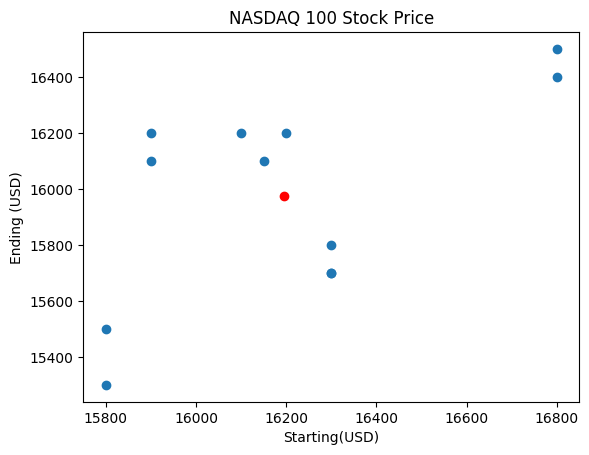

In [30]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ 100 Stock Price')

In [31]:
reg.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
m=reg.coef_
m

array([[0.65258293]])

In [36]:
c=reg.intercept_
c

array([5405.87555702])

In [37]:
#y=mx+c
m*16700+c


array([[16304.0105628]])

In [39]:
reg.predict([[16700]])

C:\Users\rezwa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [40]:
df['predicted_y']=reg.predict(x)
df.head()

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'NASDAQ 100 Stock Price')

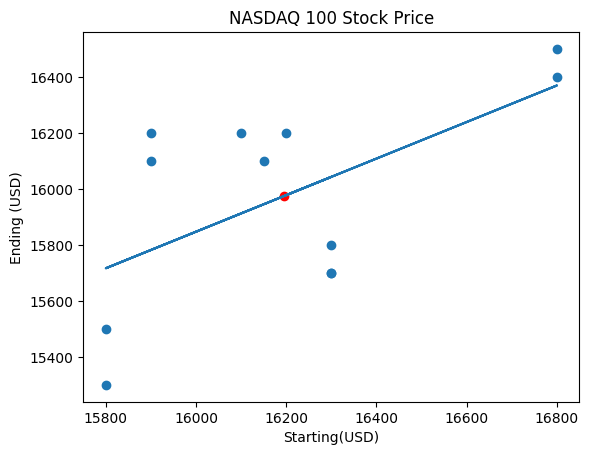

In [43]:
plt.plot(x,reg.predict(x))

plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ 100 Stock Price')

In [46]:
df['lose']=df['Ending (USD)']-df['predicted_y']
df.head()

,Starting (USD),Ending (USD),predicted_y,lose
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [47]:
#Mean square error(MSE),Mean absolute error(MAE)
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [51]:
mse=mean_squared_error(df['Ending (USD)'],df['predicted_y'])
mae=mean_absolute_error(df['Ending (USD)'],df['predicted_y'])

In [49]:
mae

260.3840017604666

In [50]:
mse

80411.23397700385

In [52]:
#Accuracy
reg.score(x,y)*100

35.778049402725706